# Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data set

In [2]:
df=pd.read_csv("AirPassengers.csv")

# Data Exploration

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.shape

(144, 2)

In [7]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


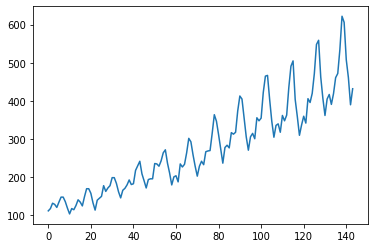

In [16]:
plt.plot(df.iloc[:,1])

# Scaling

Im using LSTM to predict but LSTM is very sensitive so im using Minmax scaler to scale all my data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
df.iloc[:,1]

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [37]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [41]:
df.shape

(144, 1)

In [42]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Splitting

splitting dataset into train and test split

In [44]:
training_size=int(len(df)*0.65)
training_size

93

In [46]:
test_size=len(df)-training_size
test_size

51

In [47]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [48]:
train_data.shape

(93, 1)

In [49]:
test_data.shape

(51, 1)

convert an array of values into a dataset matrix

In [52]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

reshape into X=t,t+1,t+2,t+3 and Y=t+4 with time step

In [53]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [55]:
X_train.shape,y_train.shape

((88, 4), (88,))

In [57]:
X_test.shape,ytest.shape

((46, 4), (46,))

reshape input to be [samples, time steps, features] which is required for LSTM we need three so adding extra feature

In [58]:
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [61]:
X_train.shape,X_test.shape

((88, 4, 1), (46, 4, 1))

# Applying Model

Create the LSTM model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\Chandru\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Chandru\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Chandru\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Chandru\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 88 samples, validate on 46 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
88/88 [==============================] - 5s 57ms/sample - loss: 0.0148 - val_loss: 0.0585
Epoch 2/100
88/88 [==============================] - 1s 10ms/sample - loss: 0.0073 - val_loss: 0.0340
Epoch 3/100
88/88 [==============================] - 1s 11ms/sample - loss: 0.0057 - val_loss: 0.0329
Epoch 4/100
88/88 [==============================] - 2s 26ms/sample - loss: 0.0055 - val_loss: 0.0255
Epoch 5/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0062 - val_loss: 0.0275
Epoch 6/100
88/88 [==============================] - 1s 9ms/sample - loss: 0.0053 - val_loss: 0.0259
Epoch 7/100
88/88 [==============================] - 1s 9ms/sample - loss: 0.0052 - val_loss: 0.0250
Epoch 8/100
88/88 [==============================] - 1s 10ms/sample - loss: 

Lets Do the prediction and check performance metrics

In [64]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Transform back from scaler to original form

In [70]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [71]:
test_predict

array([[296.64474],
       [285.0049 ],
       [377.18488],
       [303.9698 ],
       [353.12637],
       [439.56738],
       [429.86597],
       [415.85153],
       [312.78058],
       [301.53363],
       [266.30444],
       [344.9024 ],
       [310.74747],
       [294.84793],
       [379.58524],
       [300.00494],
       [366.19656],
       [451.1091 ],
       [462.20645],
       [448.7504 ],
       [261.087  ],
       [344.13507],
       [243.76265],
       [347.18668],
       [340.1673 ],
       [308.55228],
       [437.127  ],
       [323.88953],
       [428.43698],
       [457.225  ],
       [538.37244],
       [438.30292],
       [297.98923],
       [349.51688],
       [264.11548],
       [410.8147 ],
       [357.9609 ],
       [343.50238],
       [423.01007],
       [430.3411 ],
       [413.18243],
       [545.7801 ],
       [567.3266 ],
       [377.71902],
       [324.36203],
       [344.38123]], dtype=float32)

In [72]:
y_train.shape,train_predict.shape,train_predict

((88,),
 (88, 1),
 array([[134.89426],
        [128.92342],
        [143.35838],
        [153.62831],
        [152.46243],
        [142.1978 ],
        [128.23332],
        [115.59603],
        [128.12677],
        [122.70707],
        [133.4757 ],
        [147.04567],
        [140.04538],
        [132.84636],
        [157.38518],
        [174.06367],
        [171.58405],
        [161.93959],
        [140.1126 ],
        [125.37587],
        [150.18832],
        [149.62149],
        [155.11606],
        [184.11717],
        [162.9411 ],
        [178.99474],
        [182.2651 ],
        [204.02672],
        [198.45981],
        [184.83469],
        [166.42604],
        [154.18794],
        [175.50809],
        [174.3092 ],
        [184.13559],
        [196.85022],
        [181.05305],
        [188.70311],
        [225.87985],
        [227.35909],
        [242.25188],
        [199.20497],
        [195.94008],
        [176.461  ],
        [203.63933],
        [196.4253 ],
        [198.287

Check performance Metrics using mean squared error

In [73]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.16931426854805

In [74]:
 #Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

377.9730310652066

plot and check 

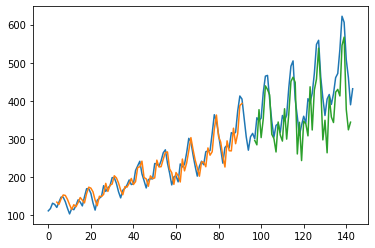

In [80]:
lookback=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict


testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(df)-1, :] = test_predict


plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The blue color line is training data and orange line is my test data ,the green color line is my predicted line 